In [2]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
import matplotlib
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import datasets
#Instead of using load_mnist, fetch_open_data can be used to load mnist dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)


In [3]:
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)

In [4]:
from sklearn.model_selection import train_test_split
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))


In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Train the SVM classifier
svm_clf = SVC(kernel='rbf', gamma='scale', C=5)  # You can adjust kernel and hyperparameters
svm_clf.fit(X_train_scaled, y_train)
# Make predictions on the test set
y_pred = svm_clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9698571428571429


Linear

In [7]:
from sklearn.svm import LinearSVC # Import the LinearSVC class
import numpy as np # imports numpy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_scaled, y_train)
y_pred = svm_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

accuracy_linear = accuracy_score(y_test, y_pred)
precision_linear = precision_score(y_test, y_pred, average='macro')
recall_linear = recall_score(y_test, y_pred, average='macro')
f1_linear = f1_score(y_test, y_pred, average='macro')

print("Linear Kernel - Accuracy:", accuracy_linear)
print("Linear Kernel - Precision:", precision_linear)
print("Linear Kernel - Recall:", recall_linear)
print("Linear Kernel - F1 Score:", f1_linear)

Accuracy: 0.9210714285714285
Linear Kernel - Accuracy: 0.9210714285714285
Linear Kernel - Precision: 0.920387987730104
Linear Kernel - Recall: 0.9200062475583716
Linear Kernel - F1 Score: 0.9199026609592815


In [10]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
svm_classifier = SVC(kernel="linear")
# Define the parameter distribution for Randomized Search

param_distributions = {"C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_classifier, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train_scaled[:6000], y_train[:6000])
print("best estimator", rnd_search_cv.best_estimator_)
print(f"Accuracy", rnd_search_cv.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ................................C=1.343885211152184; total time=   2.2s
[CV] END ................................C=1.343885211152184; total time=   3.2s
[CV] END ................................C=1.343885211152184; total time=   3.2s
[CV] END ...............................C=10.093204020787821; total time=   4.8s
[CV] END ...............................C=10.093204020787821; total time=   2.4s
[CV] END ...............................C=10.093204020787821; total time=   2.2s
[CV] END ................................C=3.587799816000169; total time=   2.2s
[CV] END ................................C=3.587799816000169; total time=   2.2s
[CV] END ................................C=3.587799816000169; total time=   2.4s
[CV] END .................................C=7.62522284353982; total time=   3.0s
[CV] END .................................C=7.62522284353982; total time=   2.3s
[CV] END .................................C=7.62

RBF

In [9]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
svm_classifier = SVC(kernel="rbf")
# Define the parameter distribution for Randomized Search
# The param_distributions should be a dictionary, not a set containing a dictionary
param_distributions = {
    "gamma": reciprocal(0.001, 0.1),
    "C": uniform(1, 10)
}
rbf_rnd_search_cv = RandomizedSearchCV(svm_classifier, param_distributions, n_iter=10, verbose=2, cv=3, random_state=42)
rbf_rnd_search_cv.fit(X_train_scaled[:6000], y_train[:6000])
best_rbf = rbf_rnd_search_cv.best_estimator_
y_pred_rbf = best_rbf.predict(X_test_scaled)

# Calculate performance metrics
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
precision_rbf = precision_score(y_test, y_pred_rbf, average='macro')
recall_rbf = recall_score(y_test, y_pred_rbf, average='macro')
f1_rbf = f1_score(y_test, y_pred_rbf, average='macro')

print("RBF Kernel - Accuracy:", accuracy_rbf)
print("RBF Kernel - Precision:", precision_rbf)
print("RBF Kernel - Recall:", recall_rbf)
print("RBF Kernel - F1 Score:", f1_rbf)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .....C=4.745401188473625, gamma=0.07969454818643935; total time=  19.8s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643935; total time=  18.8s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643935; total time=  19.4s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779727; total time=  18.1s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779727; total time=  17.5s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779727; total time=  17.7s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   8.9s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   8.5s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   7.8s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787434; total time=  18.3s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787434; total time=  19.5s
[CV] END ....C=1.5808361216819946, gamma=0.05399

In [15]:
from sklearn.svm import LinearSVC, SVC # Import the LinearSVC class
import numpy as np # imports numpy
svm_classifier = SVC(kernel='poly')
svm_classifier.fit(X_train_scaled, y_train)
y_pred = svm_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9613571428571429


In [12]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform, randint
svm_classifier = SVC(kernel="poly")

param_distributions = {
   'C': uniform(1, 10),         # Uniform distribution for C
    'degree': randint(2, 5),     # Randomly choose degree between 2 and 4 (integer)
    'coef0': reciprocal(0.01, 10)
}
poly_rnd_search_cv = RandomizedSearchCV(svm_classifier, param_distributions, n_iter=10, verbose=2, cv=3, random_state=42)
poly_rnd_search_cv.fit(X_train_scaled[:6000], y_train[:6000])
best_poly = poly_rnd_search_cv.best_estimator_
y_pred_poly = best_poly.predict(X_test_scaled)

# Calculate performance metrics
accuracy_poly = accuracy_score(y_test, y_pred_poly)
precision_poly = precision_score(y_test, y_pred_poly, average='macro')
recall_poly = recall_score(y_test, y_pred_poly, average='macro')
f1_poly = f1_score(y_test, y_pred_poly, average='macro')

print("Polynomial Kernel - Accuracy:", accuracy_poly)
print("Polynomial Kernel - Precision:", precision_poly)
print("Polynomial Kernel - Recall:", recall_poly)
print("Polynomial Kernel - F1 Score:", f1_poly)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END C=4.745401188473625, coef0=7.114476009343421, degree=4; total time=   2.5s
[CV] END C=4.745401188473625, coef0=7.114476009343421, degree=4; total time=   2.8s
[CV] END C=4.745401188473625, coef0=7.114476009343421, degree=4; total time=   3.3s
[CV] END C=8.796910002727692, coef0=0.6173770394704572, degree=3; total time=   3.4s
[CV] END C=8.796910002727692, coef0=0.6173770394704572, degree=3; total time=   3.3s
[CV] END C=8.796910002727692, coef0=0.6173770394704572, degree=3; total time=   3.9s
[CV] END C=2.5599452033620267, coef0=0.014936568554617643, degree=2; total time=   5.9s
[CV] END C=2.5599452033620267, coef0=0.014936568554617643, degree=2; total time=   5.3s
[CV] END C=2.5599452033620267, coef0=0.014936568554617643, degree=2; total time=   6.3s
[CV] END C=7.011150117432088, coef0=1.3311216080736887, degree=3; total time=   2.8s
[CV] END C=7.011150117432088, coef0=1.3311216080736887, degree=3; total time=   2.7

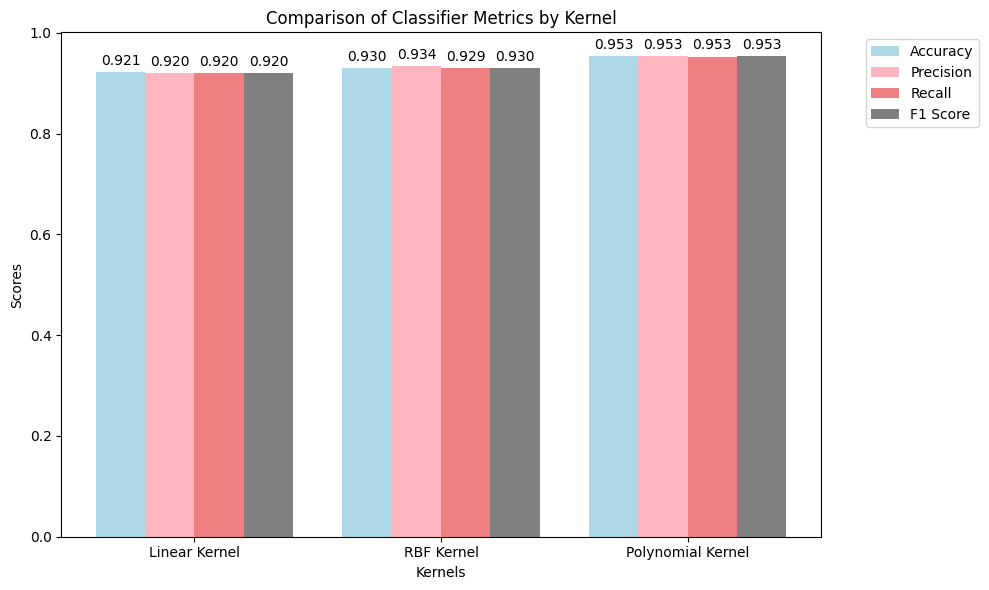

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Data
kernels = ['Linear Kernel', 'RBF Kernel', 'Polynomial Kernel']
accuracy = [0.9210714285714285, 0.9300714285714285, 0.9530714285714286]
precision = [0.920387987730104, 0.9337574310716843, 0.9529223206739064]
recall = [0.9200062475583716, 0.9293273134190183, 0.9527577477700001]
f1_score = [0.9199026609592815, 0.9303409987391978, 0.9528068781347873]

# Create an array for the x locations of the groups
x = np.arange(len(kernels))

# Set the width of the bars
width = 0.2

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the bars with colors
bars1 = ax.bar(x - width * 1.5, accuracy, width, label='Accuracy', color='lightblue')
bars2 = ax.bar(x - width / 2, precision, width, label='Precision', color='lightpink')
bars3 = ax.bar(x + width / 2, recall, width, label='Recall', color='lightcoral')
bars4 = ax.bar(x + width * 1.5, f1_score, width, label='F1 Score', color='gray')

# Adding labels and title
ax.set_xlabel('Kernels')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Classifier Metrics by Kernel')
ax.set_xticks(x)
ax.set_xticklabels(kernels)

# Adjust the legend position
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding value labels on top of the bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)
add_value_labels(bars4)

# Show plot
plt.tight_layout()
plt.show()


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
import time

# Load dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN Classifier
knn_classifier = KNeighborsClassifier()
start_time = time.time()  # Start time for training
knn_classifier.fit(X_train, y_train)  # Train classifier
knn_training_time = time.time() - start_time  # Calculate training time

# Predict on test set
y_pred_knn = knn_classifier.predict(X_test)

# Calculate metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='macro')
recall_knn = recall_score(y_test, y_pred_knn, average='macro')
f1_knn = f1_score(y_test, y_pred_knn, average='macro')


print("KNN Classifier - Accuracy:", accuracy_knn)
print("KNN Classifier - Precision:", precision_knn)
print("KNN Classifier - Recall:", recall_knn)
print("KNN Classifier - F1 Score:", f1_knn)
print("Training Time (s):", knn_training_time)


KNN Classifier - Accuracy: 0.9700714285714286
KNN Classifier - Precision: 0.9706552322744569
KNN Classifier - Recall: 0.9696706936506783
KNN Classifier - F1 Score: 0.9700278648170999
Training Time (s): 0.5603477954864502


In [17]:
from sklearn.linear_model import SGDClassifier

# SGD Classifier
sgd_classifier = SGDClassifier()
start_time = time.time()  # Start time for training
sgd_classifier.fit(X_train, y_train)  # Train classifier
sgd_training_time = time.time() - start_time  # Calculate training time

# Predict on test set
y_pred_sgd = sgd_classifier.predict(X_test)

# Calculate metrics
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
precision_sgd = precision_score(y_test, y_pred_sgd, average='macro')
recall_sgd = recall_score(y_test, y_pred_sgd, average='macro')
f1_sgd = f1_score(y_test, y_pred_sgd, average='macro')

print("SGD Classifier - Accuracy:", accuracy_sgd)
print("SGD Classifier - Precision:", precision_sgd)
print("SGD Classifier - Recall:", recall_sgd)
print("SGD Classifier - F1 Score:", f1_sgd)
print("Training Time (s):", sgd_training_time)

SGD Classifier - Accuracy: 0.8760714285714286
SGD Classifier - Precision: 0.8833933106292937
SGD Classifier - Recall: 0.8752322803382473
SGD Classifier - F1 Score: 0.8764575625537192
Training Time (s): 197.95500493049622


In [18]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
start_time = time.time()  # Start time for training
rf_classifier.fit(X_train, y_train)  # Train classifier
rf_training_time = time.time() - start_time  # Calculate training time

# Predict on test set
y_pred_rf = rf_classifier.predict(X_test)

# Calculate metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro')
recall_rf = recall_score(y_test, y_pred_rf, average='macro')
f1_rf = f1_score(y_test, y_pred_rf, average='macro')

print("Random Forest Classifier - Accuracy:", accuracy_rf)
print("Random Forest Classifier - Precision:", precision_rf)
print("Random Forest Classifier - Recall:", recall_rf)
print("Random Forest Classifier - F1 Score:", f1_rf)
print("Training Time (s):", rf_training_time)


Random Forest Classifier - Accuracy: 0.9668571428571429
Random Forest Classifier - Precision: 0.9666859409332821
Random Forest Classifier - Recall: 0.9667211432291444
Random Forest Classifier - F1 Score: 0.9666878918509296
Training Time (s): 53.63914227485657


In [2]:
from sklearn.svm import SVC

# SVM Classifier
svm_classifier = SVC(kernel='poly')
start_time = time.time()  # Start time for training
svm_classifier.fit(X_train, y_train)  # Train classifier
training_time_svm = time.time() - start_time  # Calculate training time

# Predict on test set
y_pred_svm = svm_classifier.predict(X_test)

# Calculate metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='macro')
recall_svm = recall_score(y_test, y_pred_svm, average='macro')
f1_svm = f1_score(y_test, y_pred_svm, average='macro')

print("SVM Classifier - Accuracy:", accuracy_svm)
print("SVM Classifier - Precision:", precision_svm)
print("SVM Classifier - Recall:", recall_svm)
print("SVM Classifier - F1 Score:", f1_svm)
print("Training Time (s):", training_time_svm)

SVM Classifier - Accuracy: 0.9739285714285715
SVM Classifier - Precision: 0.9740037832827777
SVM Classifier - Recall: 0.9737707809786281
SVM Classifier - F1 Score: 0.9738427144215536
Training Time (s): 290.9013350009918


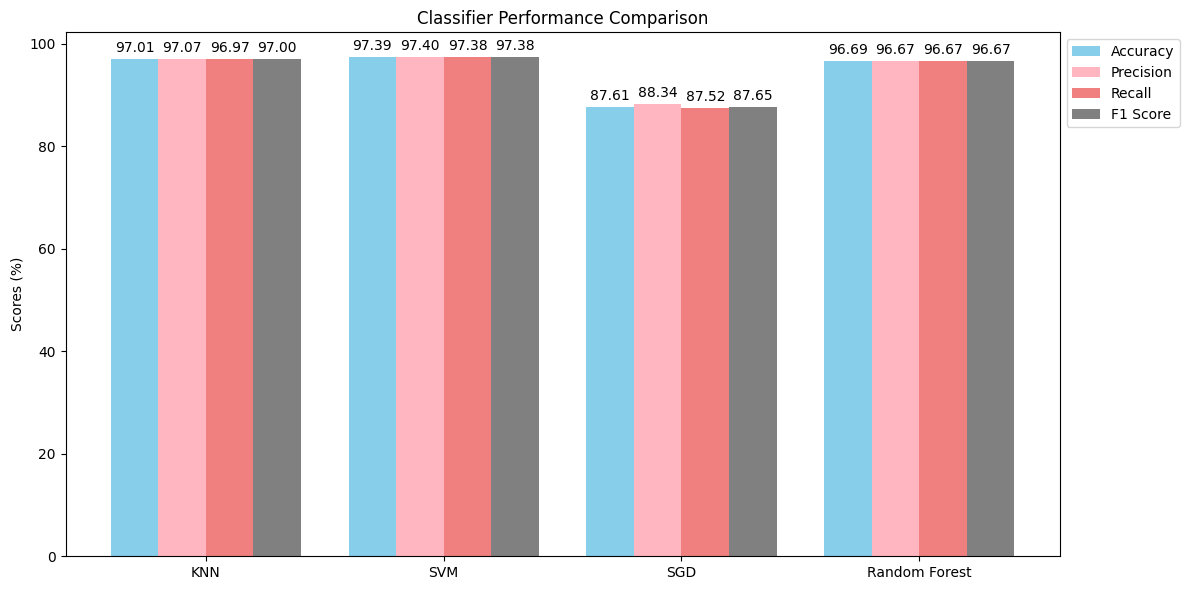

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Classifier results
results = {
    'KNN': {
        'Accuracy': 0.9701,
        'Precision': 0.9707,
        'Recall': 0.9697,
        'F1 Score': 0.9700,
        'Training Time (s)': 0.5603
    },
    'SVM': {
        'Accuracy': 0.9739,
        'Precision': 0.9740,
        'Recall': 0.9738,
        'F1 Score': 0.9738,
        'Training Time (s)': 290.9013
    },
    'SGD': {
        'Accuracy': 0.8761,
        'Precision': 0.8834,
        'Recall': 0.8752,
        'F1 Score': 0.8765,
        'Training Time (s)': 197.9550
    },
    'Random Forest': {
        'Accuracy': 0.9669,
        'Precision': 0.9667,
        'Recall': 0.9667,
        'F1 Score': 0.9667,
        'Training Time (s)': 53.6391
    }
}

# Prepare data for plotting
classifiers = list(results.keys())
accuracy = [results[clf]['Accuracy'] * 100 for clf in classifiers]
precision = [results[clf]['Precision'] * 100 for clf in classifiers]
recall = [results[clf]['Recall'] * 100 for clf in classifiers]
f1_score = [results[clf]['F1 Score'] * 100 for clf in classifiers]

# Plotting
x = np.arange(len(classifiers))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Create bars for each metric
bars1 = ax.bar(x - width * 1.5, accuracy, width, label='Accuracy', color='skyblue')
bars2 = ax.bar(x - width / 2, precision, width, label='Precision', color='lightpink')
bars3 = ax.bar(x + width / 2, recall, width, label='Recall', color='lightcoral')
bars4 = ax.bar(x + width * 1.5, f1_score, width, label='F1 Score', color='gray')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores (%)')
ax.set_title('Classifier Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(classifiers)

# Move the legend to the right side
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adding the value labels on top of the bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Apply value labels for each set of bars
add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)
add_value_labels(bars4)

plt.tight_layout()  # Adjust layout for better appearance
plt.show()  # Display the plot
